## Machine Learning on Water_Potability Dataset
Written by: Pooja D\
Email: piyadinani@gmail.com\
Date: 05/12/23

In [26]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.express as px
from scipy import stats

In [27]:
# Importing dataset
df = pd.read_csv('water_potability.csv')
# Displaying first few rows of dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [28]:
# Displaying basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [29]:
# Displaying statistical summary of dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [30]:
# Displaying number of unique values in each column of dataset
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [31]:
# Checking for missing values
df.isnull().sum() / len(df) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [32]:
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

In [33]:
df.isnull().sum() / len(df) * 100

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

In [34]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False])

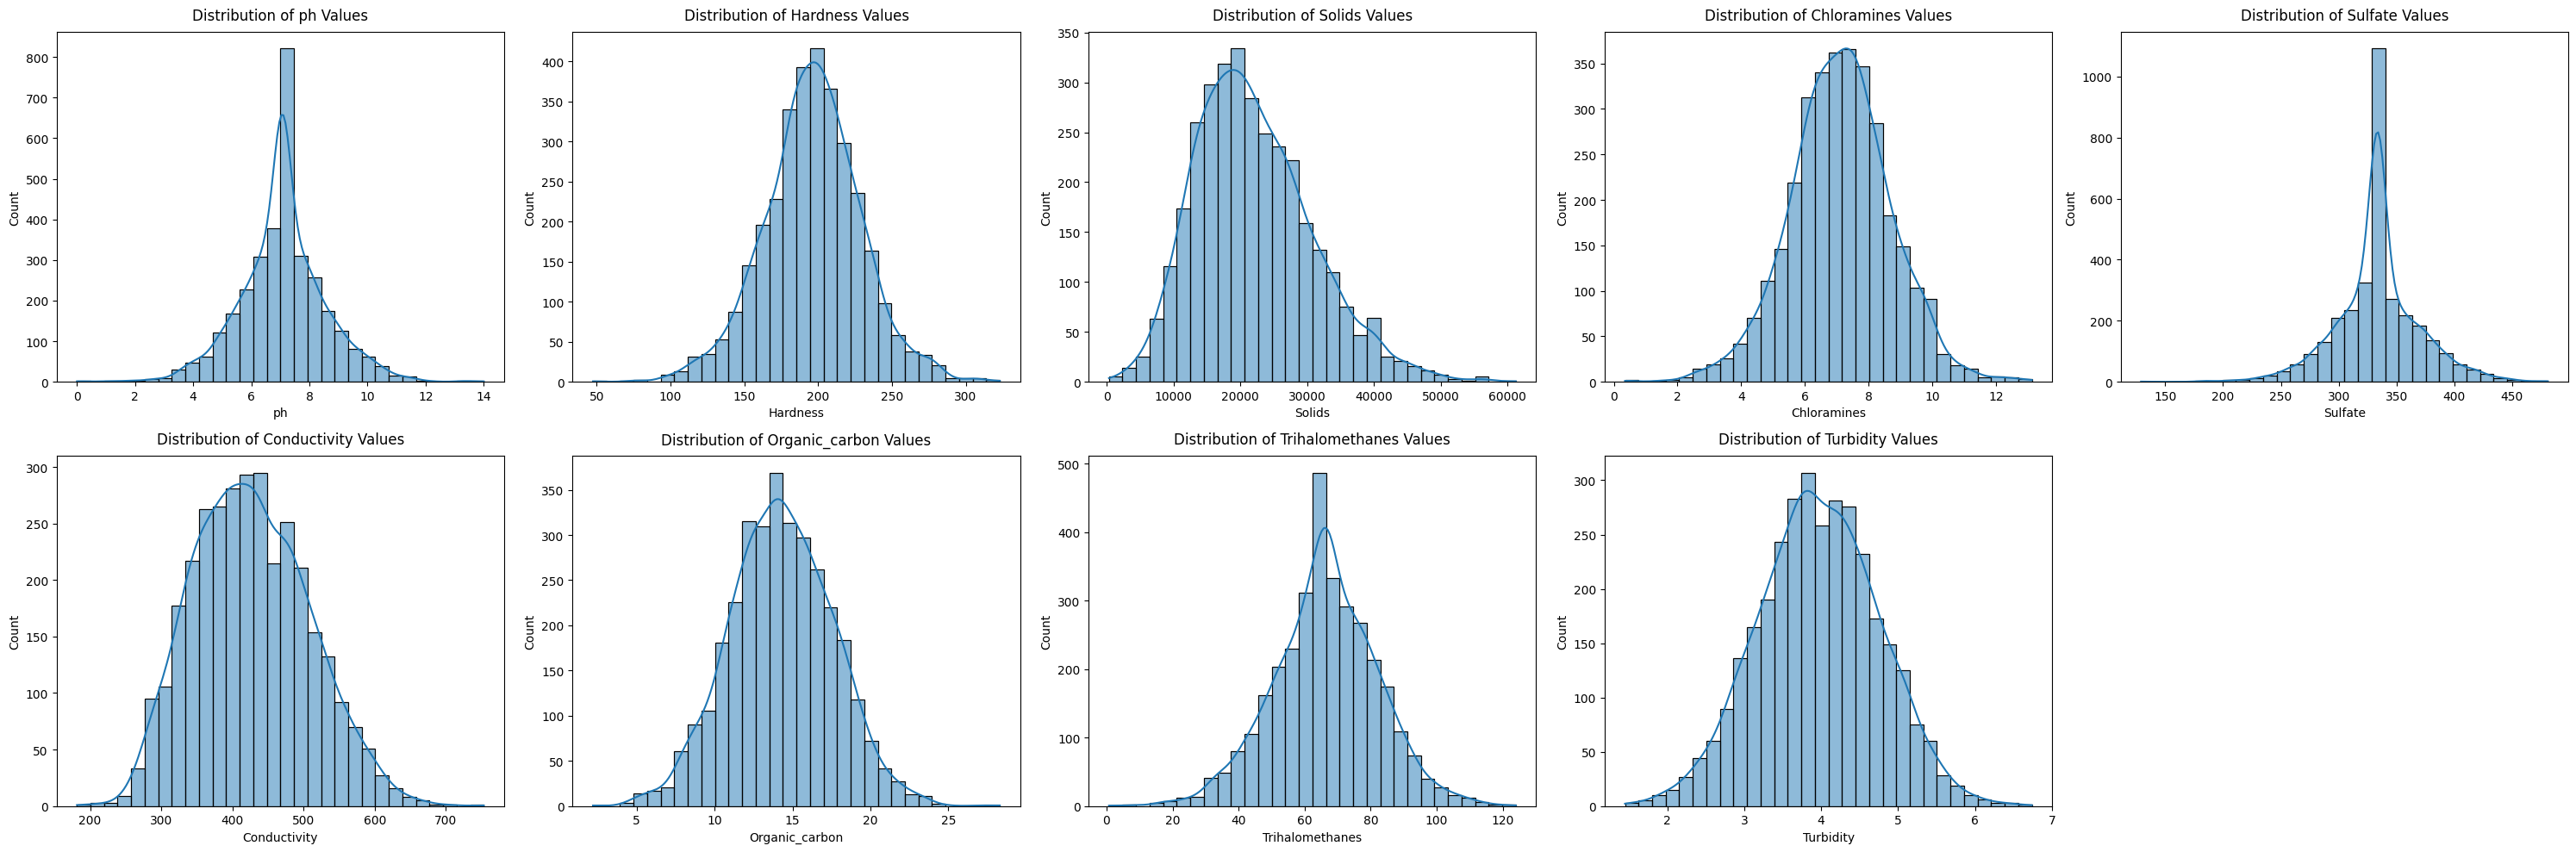

In [35]:
# Checking normality of dataset

# Excluding 'Potability' column
cols_to_plot = [col for col in df.columns if col != 'Potability']

# Setting number of columns and rows for subplots
cols_num = len(cols_to_plot)
rows_num = 2

# Calculating number of subplots needed
subplots_needed = cols_num

# Calculating the number of subplots per row
subplots_per_row = cols_num // rows_num + (cols_num % rows_num > 0)

# Creating subplots with layout
fig, axes = plt.subplots(rows_num, subplots_per_row, figsize=(30, 10))
axes = axes.flatten()

# Displaying histogram for each column excluding Potability
for idx, column in enumerate(cols_to_plot):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column} Values', pad=10)  # Adjust title position

# Removing empty subplots
for idx in range(subplots_needed, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and font size
plt.tight_layout()
plt.show()


In [36]:
# Appling shapiro test 
from scipy.stats import shapiro
cols_for_shapiro = [col for col in df.columns if col != 'Potability']

for column in cols_for_shapiro:
    stat, p_value = shapiro(df[column])
    print(f"{column}: Statistic={stat}, p-value={p_value}")


ph: Statistic=0.9799453616142273, p-value=4.005386644463272e-21
Hardness: Statistic=0.9959684014320374, p-value=9.584165638898412e-08
Solids: Statistic=0.9777269959449768, p-value=2.955943348526295e-22
Chloramines: Statistic=0.996772050857544, p-value=1.8123619156540371e-06
Sulfate: Statistic=0.9591533541679382, p-value=2.022865760070168e-29
Conductivity: Statistic=0.9929697513580322, p-value=1.5015037824195332e-11
Organic_carbon: Statistic=0.9995209574699402, p-value=0.6202165484428406
Trihalomethanes: Statistic=0.9969845414161682, p-value=4.1832927308860235e-06
Turbidity: Statistic=0.9996957778930664, p-value=0.9306948781013489


In [37]:
print(stats.anderson(df['ph']))
print(stats.anderson(df['Sulfate']))

AndersonResult(statistic=27.20185016355117, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=7.080794504276836, scale=1.469955969846563)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
AndersonResult(statistic=61.900902302943905, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=333.7757766108134, scale=36.14261216633989)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


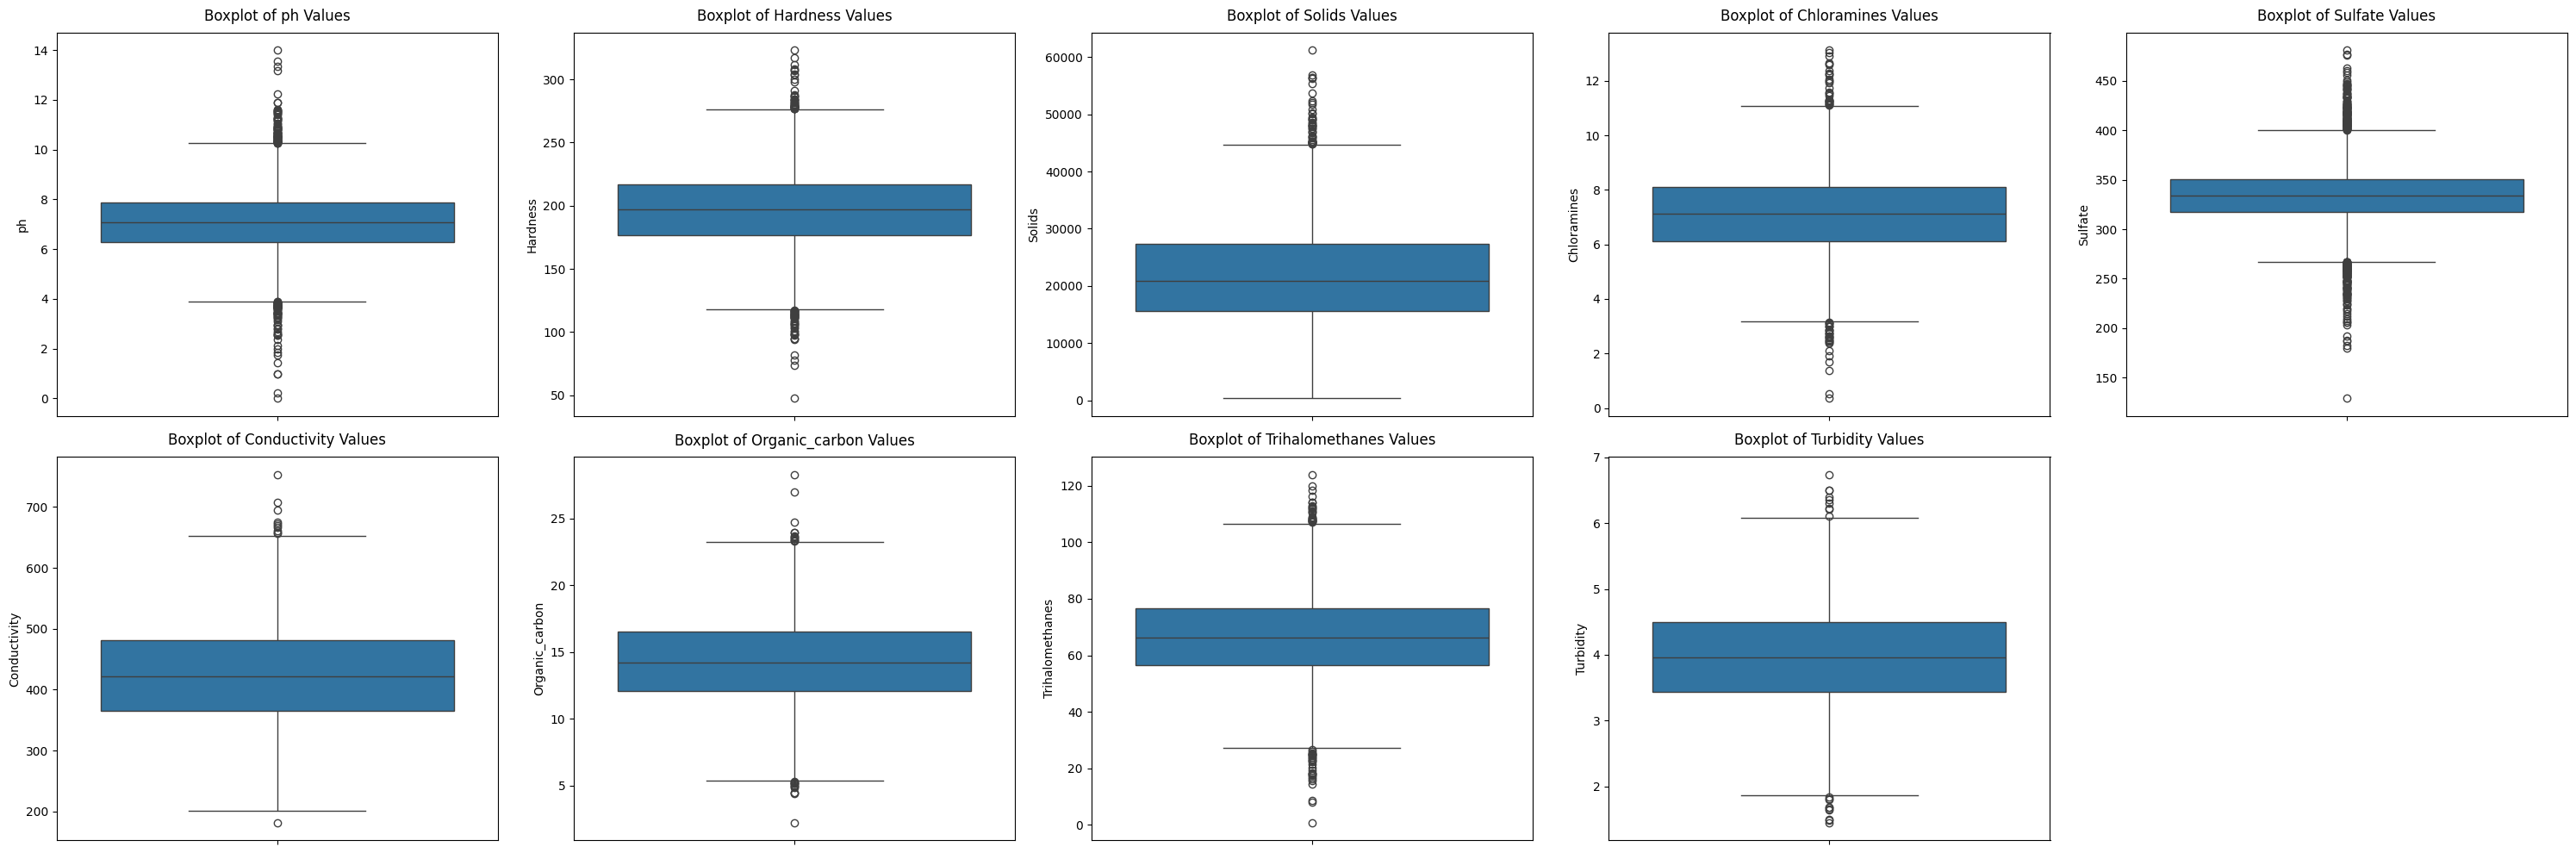

In [38]:
# Checking outliers in dataset

# Excluding 'Potability' column
cols_to_plot_bp = [col for col in df.columns if col != 'Potability']

# Setting number of columns and rows for subplots
cols_num_bp = len(cols_to_plot_bp)
rows_num_bp = 2

# Calculating number of subplots needed
subplots_needed_bp = cols_num_bp

# Calculating the number of subplots per row
subplots_per_row_bp = cols_num_bp // rows_num_bp + (cols_num_bp % rows_num_bp > 0)

# Creating subplots with layout
fig, axes = plt.subplots(rows_num_bp, subplots_per_row_bp, figsize=(30, 10))
axes = axes.flatten()

# Displaying boxplot for each column excluding Potability
for idx, column in enumerate(cols_to_plot_bp):
    sns.boxplot(y=df[column], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {column} Values', pad=10)  
# Removing empty subplots
for idx in range(subplots_needed_bp, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and font size
plt.tight_layout()
plt.show()


In [41]:
# Removing outliers using IQR method
columns_to_exclude = ['Potability']
Q1 = df.drop(columns=columns_to_exclude).quantile(0.25)
Q3 = df.drop(columns=columns_to_exclude).quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df.drop(columns=columns_to_exclude) < (Q1 - 1.5 * IQR)) | (df.drop(columns=columns_to_exclude) > (Q3 + 1.5 * IQR))).any(axis=1)
df_no_outliers_iqr = df[~outlier_mask]

print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape After Removing Outliers (IQR method):", df_no_outliers_iqr.shape)



Original DataFrame Shape: (3276, 10)
DataFrame Shape After Removing Outliers (IQR method): (2666, 10)


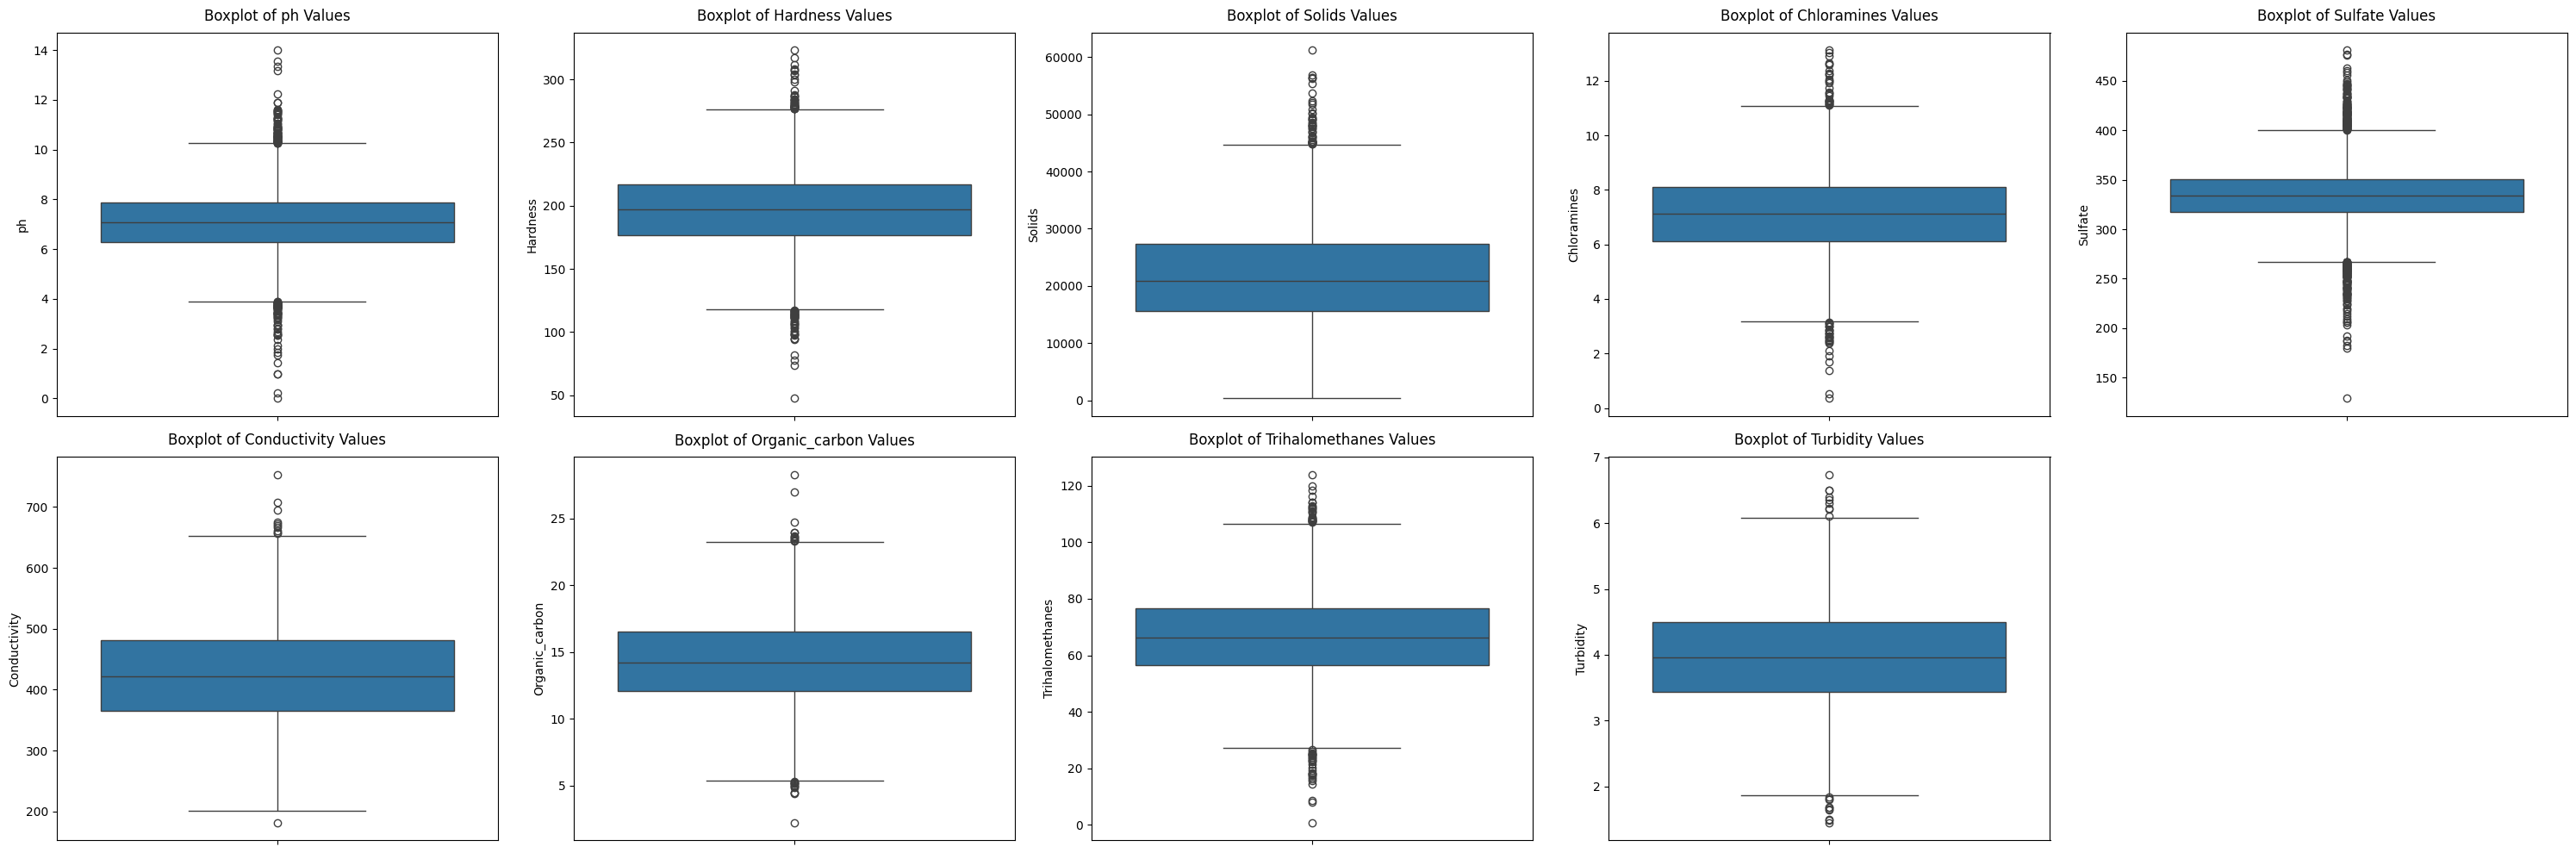

In [42]:
# Checking outliers in dataset

# Excluding 'Potability' column
cols_to_plot_bp = [col for col in df.columns if col != 'Potability']

# Setting number of columns and rows for subplots
cols_num_bp = len(cols_to_plot_bp)
rows_num_bp = 2

# Calculating number of subplots needed
subplots_needed_bp = cols_num_bp

# Calculating the number of subplots per row
subplots_per_row_bp = cols_num_bp // rows_num_bp + (cols_num_bp % rows_num_bp > 0)

# Creating subplots with layout
fig, axes = plt.subplots(rows_num_bp, subplots_per_row_bp, figsize=(30, 10))
axes = axes.flatten()

# Displaying boxplot for each column excluding Potability
for idx, column in enumerate(cols_to_plot_bp):
    sns.boxplot(y=df[column], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {column} Values', pad=10)  
# Removing empty subplots
for idx in range(subplots_needed_bp, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and font size
plt.tight_layout()
plt.show()


In [43]:
# Appling shapiro test 
from scipy.stats import shapiro
cols_for_shapiro = [col for col in df.columns if col != 'Potability']

for column in cols_for_shapiro:
    stat, p_value = shapiro(df[column])
    print(f"{column}: Statistic={stat}, p-value={p_value}")


ph: Statistic=0.9799453616142273, p-value=4.005386644463272e-21
Hardness: Statistic=0.9959684014320374, p-value=9.584165638898412e-08
Solids: Statistic=0.9777269959449768, p-value=2.955943348526295e-22
Chloramines: Statistic=0.996772050857544, p-value=1.8123619156540371e-06
Sulfate: Statistic=0.9591533541679382, p-value=2.022865760070168e-29
Conductivity: Statistic=0.9929697513580322, p-value=1.5015037824195332e-11
Organic_carbon: Statistic=0.9995209574699402, p-value=0.6202165484428406
Trihalomethanes: Statistic=0.9969845414161682, p-value=4.1832927308860235e-06
Turbidity: Statistic=0.9996957778930664, p-value=0.9306948781013489


In [12]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


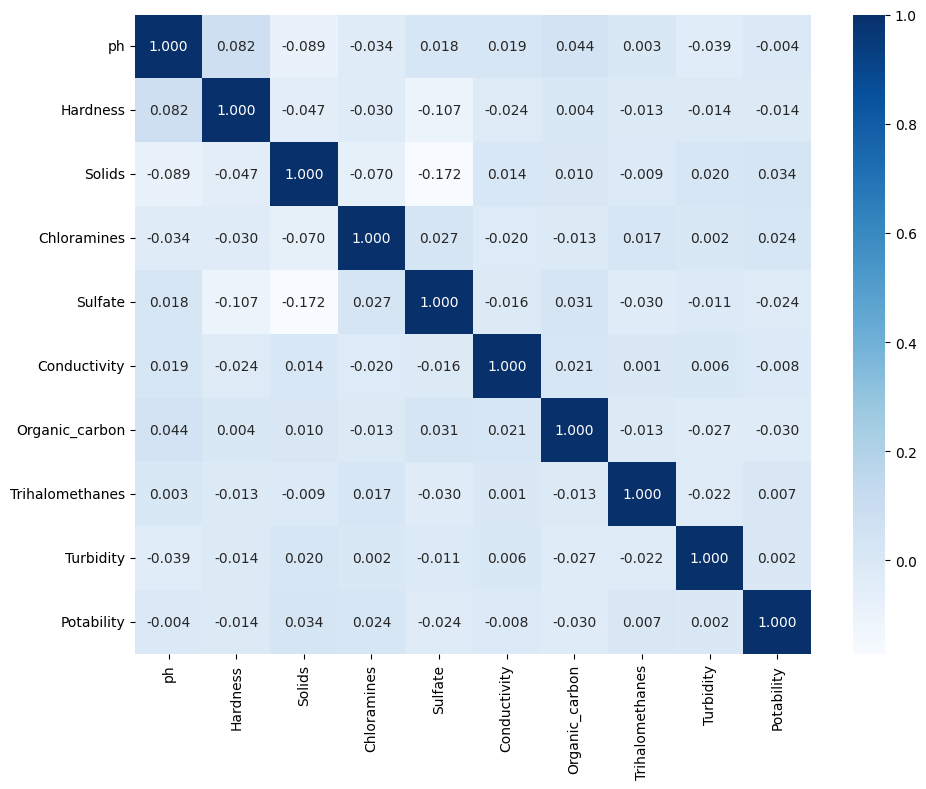

In [13]:
# Analyzing relationship between variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.3f')
plt.tight_layout()
plt.show()

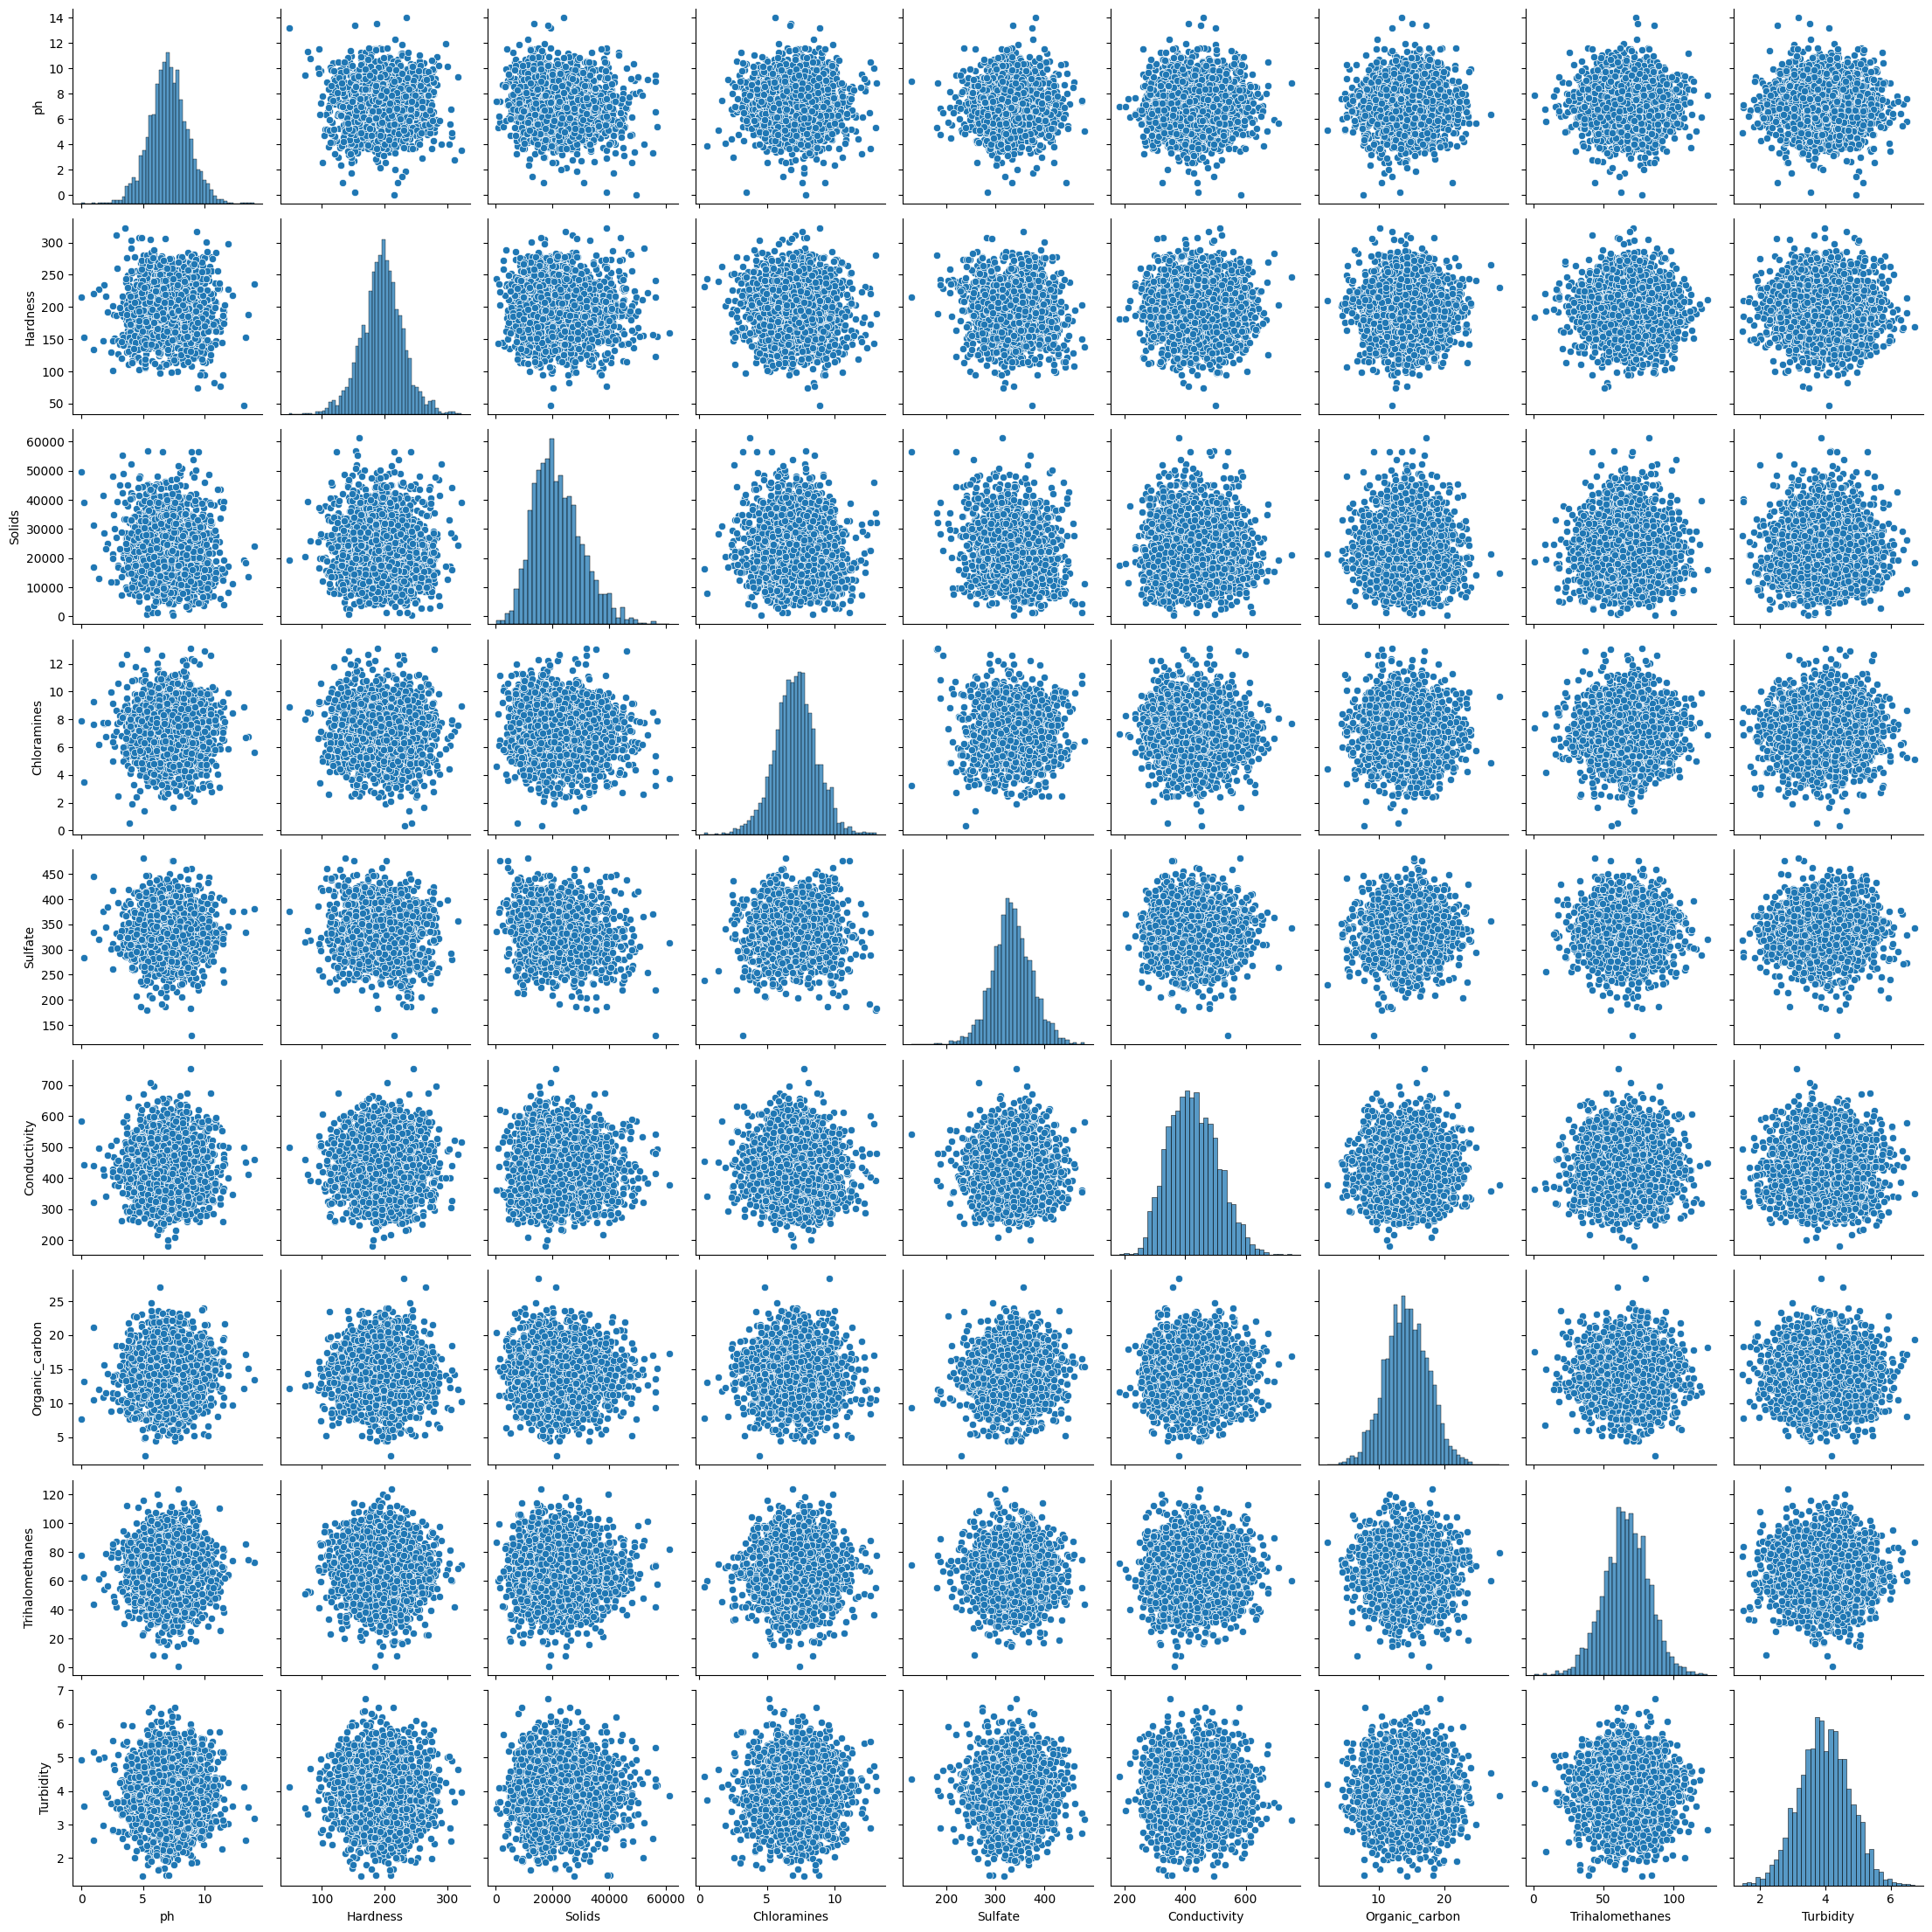

In [14]:
sns.pairplot(df.drop('Potability', axis=1))
plt.show()

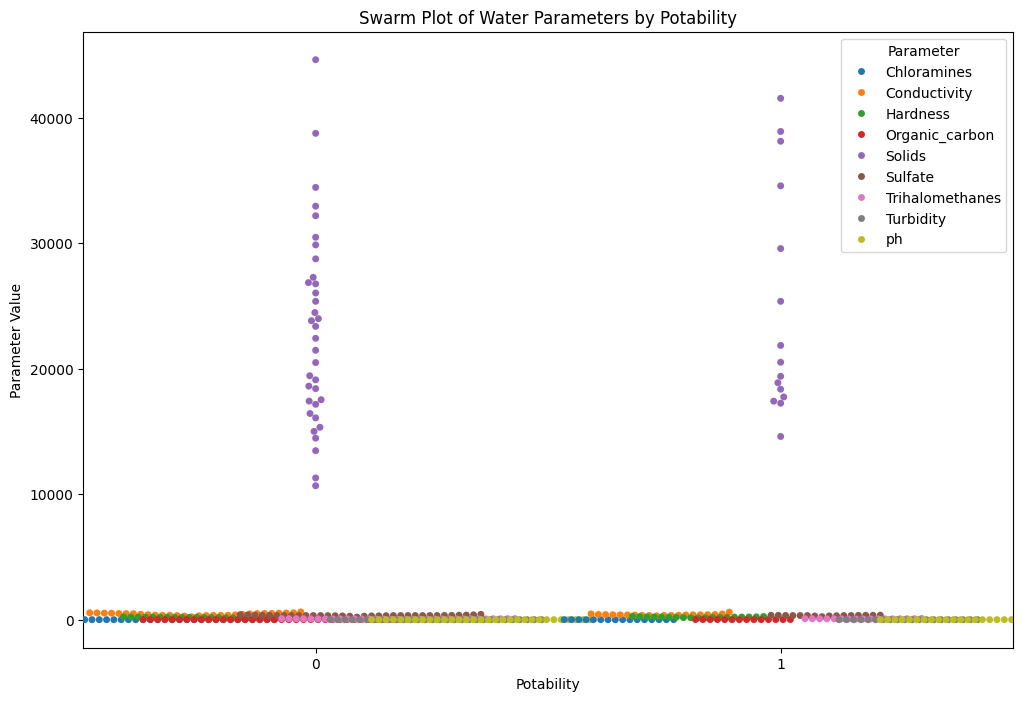

In [45]:
df_long = pd.melt(df, id_vars=['Potability'], var_name='Parameter', value_name='Value')
df_long_sample = df_long.groupby('Parameter').apply(lambda x: x.sample(n=50)).reset_index(drop=True)
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Potability', y='Value', data=df_long_sample, hue='Parameter', dodge=True)
plt.xlabel('Potability')
plt.ylabel('Parameter Value')
plt.title('Swarm Plot of Water Parameters by Potability')
plt.show()

In [44]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Potability'])), columns=df.columns[:-1])
df_scaled['Potability'] = df['Potability']
